<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.3 Modelos compartimentales </h3>
<h3 style="text-align: center;"> Modelo SIR: Ejercicios</h3>

Este modelo representa la evolución de una epidemia que se expande en una población fija. Evaluaremos la efectividad de diversas intervenciones. Más detalles se pueden encontrar en el trabajo de [Smith and Moore (2001)](https://maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction)

## El modelo Kermack-McKendrick

El modelo denominado *SIR* se aplica a una población finita de individuos, que desarrollan una enfermedad de la cual se pueden recuperar de forma natural tras un tiempo de desarrollo de la enfermedad. Este el caso de enfermedades comunes, como la gripe estacional. Tenemos tres tipos de individuos:

-   *S*: Personas "susceptibles", o sea, aquellas que pueden contraer la enfermedad si entran en contacto con un infectado.

-   *I*: Personas "infectadas", o sea, aquellas que sufren la enfermedad y pueden pasar la enfermedad a un susceptible si entran en contacto con él. 

-   *R*: Personas "recuperadas", personas que han pasado la enfermedad y que no la van a tener nuevamente.  

Supóngase una población fija de $N$ individuos, de los cuales tenemos una fracción $s$, $i$ y $r$ de susceptibles, infectados y recuperados, respectivamente. Entonces $s+i+r=1$. 

Veamos cómo evolucionan estas variables. Supóngase que un individuo susceptible necesita en media $T_s$ días para entrar en contacto con toda la población. Entonces podemos asumir que cada día entra en contacto con $\beta_s N=1/T_s N$ individuos, de los cuales una fracción $i$ están infectados. Entonces, dado que $sN$ es el número de individuos susceptibles, el número de contactos de esos individuos con infectados cada día es de $\beta_s N i sN$. Si la probabilidad de ser infectado por cada contacto es $\beta_i$, entonces el número de nuevos infectados cada día es de $\beta_i \beta_s N i sN$.

¿Cómo se recuperan los infectados? Si el número de días de recuperacion es de $T_r$, entonces podemos asumir que cada día se recuperan $\gamma=1/T_r$ individuos. Por tanto, el total de individuos que se recuperan cada día es de $\gamma i N$.

Por tanto:

-   The número de nuevos infectados cada día es $\beta_i \beta_s N i sN$. Dividiendo por el número total de individuos $N$, tenemos que la fracción diaria de infectados cada día es de $\beta_i \beta_s N i s$. Por simplicidad en la notación, definimso $\beta= \beta_i \beta_s N$, por lo que la tasa de nuevos infectados cada día es $\beta s i$.

-   The número de individuos que se recuperan cada día es de $\gamma i N$. Dividiendo por el total de individuos $N$ tenemos que la tasa de recuperaciones cada día es de $\gamma i$.

Las siguientes ecuaciones determinan la evolución de la tasa de susceptibles, infectados y recuperados cada día: 


$$\begin{aligned}
\frac{ds}{dt} &= -\beta s i \\
\frac{di}{dt} &= \beta s i - \gamma i\\
\frac{dr}{dt} &= \gamma i\end{aligned}$$ 


### Ejercicio 1

Simular el modelo asumiendo unas condiciones iniciales y parámetros dados. 

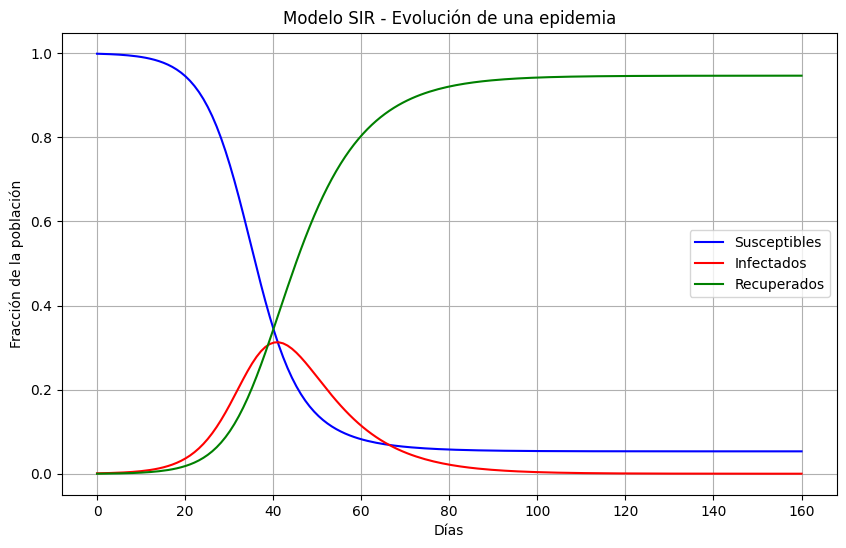

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos las ecuaciones diferenciales del modelo SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parámetros del modelo
N = 1000  # población total
I0 = 1 / N  # fracción inicial de infectados
R0 = 0  # fracción inicial de recuperados
S0 = 1 - I0 - R0  # fracción inicial de susceptibles
beta = 0.3  # tasa de transmisión
gamma = 0.1  # tasa de recuperación

# Definir la función de Euler para resolver las ODEs
def solveODE_euler(f, x0, t, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * np.array(f(x[i], t[i], *arg))
    return x

# Condiciones iniciales
y0 = [S0, I0, R0]

# Tiempo de simulación (en días)
t = np.linspace(0, 160, 160)

# Resolver el sistema de ecuaciones diferenciales
#solution = odeint(sir_model, y0, t, args=(beta, gamma))
solution = solveODE_euler(sir_model, y0, t, arg=(beta, gamma))
S, I, R = solution.T

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptibles", color="blue")
plt.plot(t, I, label="Infectados", color="red")
plt.plot(t, R, label="Recuperados", color="green")
plt.xlabel("Días")
plt.ylabel("Fracción de la población")
plt.title("Modelo SIR - Evolución de una epidemia")
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 2

El parámetro $\beta$ se refiere a la tasa de contactos entre infectados y susceptibles, por lo que actuar sobre él se refiere a la implementación de medidas de alejamiento entre los individuos, como cuarentenas, etc. El parámetro $\gamma$ se refiere a la tasa de recuperación diaria, por lo que se refiere a medidas de acortamiento del proceso patológico.

Estudiar las sensibilidad de los parámetros ($\beta$ y $\gamma$) sobre el número máximo de infectados durante la epidemia, dadas las condiciones iniciales y valores de los parámetros determinadas anteriormente.

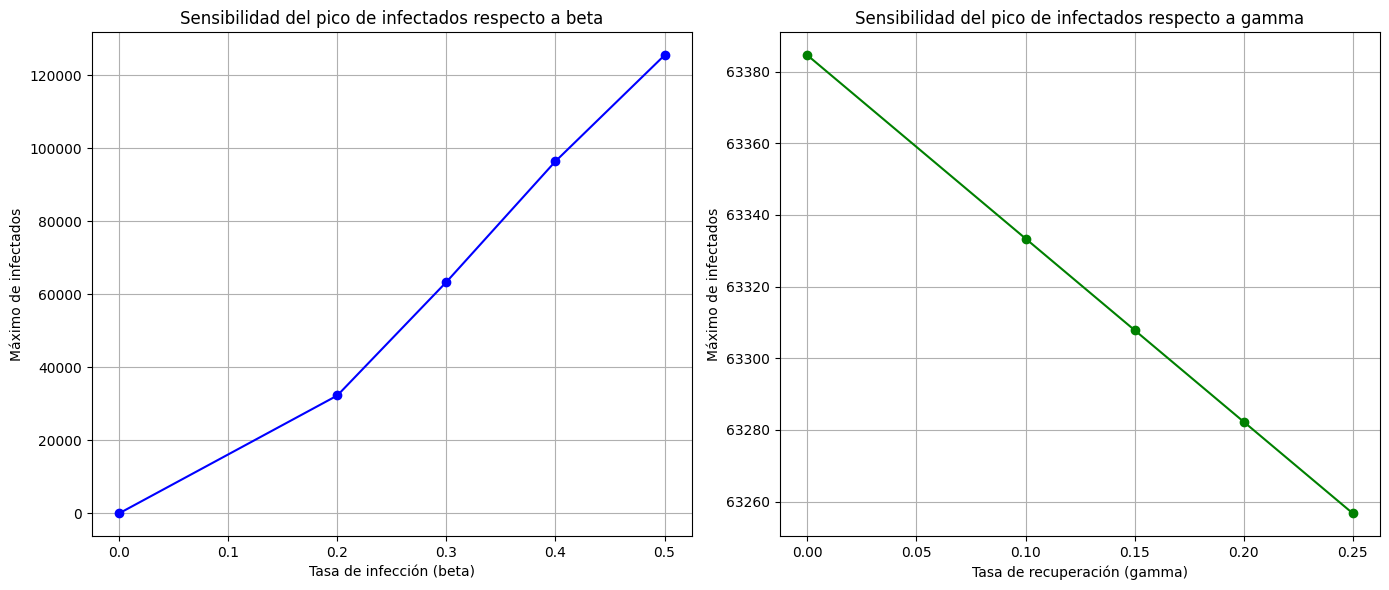

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos las ecuaciones diferenciales del modelo SIR
def sir_model(S, I, R, beta, gamma):
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Parámetros del modelo
N = 1000  # población total
I0 = 1 / N  # fracción inicial de infectados
R0 = 0  # fracción inicial de recuperados
S0 = 1 - I0 - R0  # fracción inicial de susceptibles
beta = 0.3  # tasa de transmisión
gamma = 0.1  # tasa de recuperación

# Definir la función de Euler para resolver las ODEs
def solveODE_euler(f, x0, t, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * np.array(f(*x[i], *arg))
    return x

# Condiciones iniciales
y0 = [S0, I0, R0]

# Tiempo de simulación (en días)
t = np.linspace(0, 160, 160)

# Resolver el sistema de ecuaciones diferenciales
solution = solveODE_euler(sir_model, y0, t, arg=(beta, gamma))
S, I, R = solution.T


# Definición de una función para ejecutar el modelo SIR y devolver el número máximo de infectados
def sir_simulation(beta, gamma, N, dias, I0):
    S0 = N - I0
    R0 = 0
    S = [S0]
    I = [I0]
    R = [R0]
    
    for day in range(1, dias):
        dSdt, dIdt, dRdt = sir_model(S[-1], I[-1], R[-1], beta, gamma)
        S.append(S[-1] + dSdt)
        I.append(I[-1] + dIdt)
        R.append(R[-1] + dRdt)

    return max(I)  # Devolver el máximo número de infectados

# Parámetros iniciales
betas = [0, 0.2, 0.3, 0.4, 0.5]  # Variar el parámetro beta
gamma = 0.1  # Mantener gamma constante
dias = 160
I0 = 1
N = 1000

# Calcular el número máximo de infectados para cada valor de beta
max_infectados_beta = [sir_simulation(b, gamma, N, dias, I0) for b in betas]

# Variar ahora gamma
gammas = [0, 0.1, 0.15, 0.2, 0.25]  # Variar el parámetro gamma
beta = 0.3  # Mantener beta constante

# Calcular el número máximo de infectados para cada valor de gamma
max_infectados_gamma = [sir_simulation(beta, g, N, dias, I0) for g in gammas]

# Graficar la sensibilidad de los parámetros beta y gamma
plt.figure(figsize=(14,6))

# Gráfico para beta
plt.subplot(1, 2, 1)
plt.plot(betas, max_infectados_beta, marker='o', color='blue')
plt.title('Sensibilidad del pico de infectados respecto a beta')
plt.xlabel('Tasa de infección (beta)')
plt.ylabel('Máximo de infectados')
plt.grid()

# Gráfico para gamma
plt.subplot(1, 2, 2)
plt.plot(gammas, max_infectados_gamma, marker='o', color='green')
plt.title('Sensibilidad del pico de infectados respecto a gamma')
plt.xlabel('Tasa de recuperación (gamma)')
plt.ylabel('Máximo de infectados')
plt.grid()

plt.tight_layout()
plt.show()


### Ejercicio 3

Representar el número acumulado final de infectados (variable recuperados) en función de los parámetros $\beta$ y $\gamma$ representar en la misma gráfica distintos valores de $\beta$ y $\gamma$ (por medio de la representación de diversas curvas o por medio de un **heatmap**).  

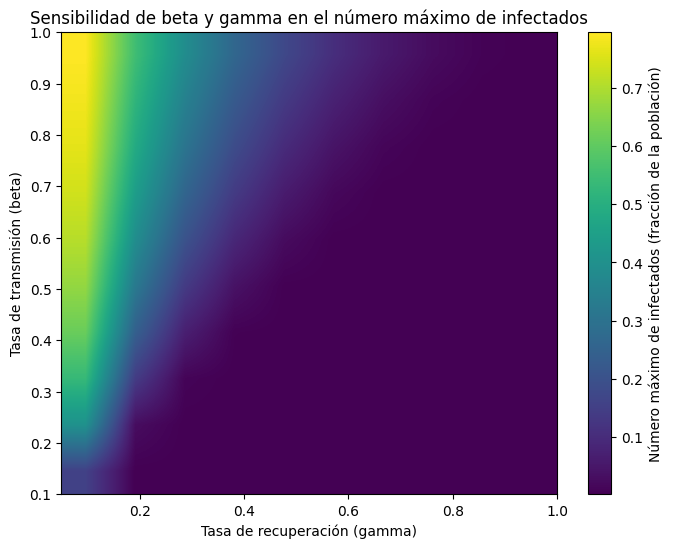

In [ ]:
# Vamos a explorar la sensibilidad de los parámetros beta y gamma sobre el número máximo de infectados

# Definir una función para encontrar el máximo número de infectados
def max_infected(beta, gamma):
    solution = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = solution.T
    return max(I)

# Crear diferentes valores para beta y gamma
beta_values = np.linspace(0.1, 1, 10)
gamma_values = np.linspace(0.05, 1, 10)

# Crear una matriz para almacenar los resultados
max_infected_matrix = np.zeros((len(beta_values), len(gamma_values)))

# Llenar la matriz con el número máximo de infectados para cada combinación de beta y gamma
for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        max_infected_matrix[i, j] = max_infected(beta, gamma)

# Graficar los resultados como un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(max_infected_matrix, extent=[gamma_values.min(), gamma_values.max(), beta_values.min(), beta_values.max()], origin='lower', aspect='auto', cmap="viridis", interpolation="bilinear")
plt.colorbar(label="Número máximo de infectados (fracción de la población)")
plt.xlabel("Tasa de recuperación (gamma)")
plt.ylabel("Tasa de transmisión (beta)")
plt.title("Sensibilidad de beta y gamma en el número máximo de infectados")
plt.show()


### Ejercicio 4

Estudiar la evolución de la enfermedad cuando se implementa una medida de inmunización. Esta medida asume que una parte de la población susceptible se extrae cada día en una nueva variable de estado llamada *inmunizados*. Estudiar el efecto de la tasa diaria de inmunización sobre el total de infectados por la enfermedad. 

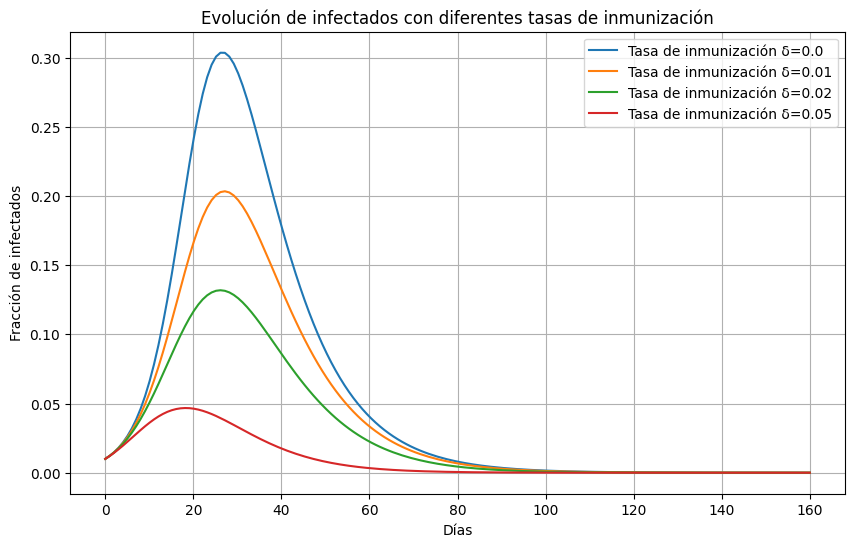

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos las ecuaciones diferenciales del modelo SIRM (SIR con inmunización)
def sirm_model(y, t, beta, gamma, delta):
    S, I, R, M = y
    dSdt = -beta * S * I - delta * S
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I + delta * S
    dMdt = delta * I # pasaron la enfermedad y se inmunizaron
    return [dSdt, dIdt, dRdt, dMdt]

# Parámetros del modelo
N = 1000  # población total
I0 = 0.01 # fracción inicial de infectados
R0 = 0 # fracción inicial de recuperados
M0 = 0  # fracción inicial de inmunizados
S0 = 1 - I0 - R0 - M0  # fracción inicial de susceptibles
beta = 0.3  # tasa de transmisión
gamma = 0.1  # tasa de recuperación

# Tasa de inmunización diaria (ajustable para el análisis de sensibilidad)
delta_values = [0.0, 0.01, 0.02, 0.05]  # Valores de la tasa diaria de inmunización

# Tiempo de simulación (en días)
t = np.linspace(0, 160, 160)

# Graficar el efecto de la tasa de inmunización sobre el total de infectados
plt.figure(figsize=(10, 6))

for delta in delta_values:
    # Condiciones iniciales
    y0 = [S0, I0, R0, M0]

    # Resolver el sistema de ecuaciones diferenciales usando odeint
    solution = odeint(sirm_model, y0, t, args=(beta, gamma, delta))
    S, I, R, M = solution.T

    # Graficar la evolución de los infectados
    plt.plot(t, I, label=f"Tasa de inmunización δ={delta}")

plt.xlabel("Días")
plt.ylabel("Fracción de infectados")
plt.title("Evolución de infectados con diferentes tasas de inmunización")
plt.legend()
plt.grid(True)
plt.show()
